In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_auc_score
import matplotlib.pyplot as plt
import argparse

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded=files.upload()

Saving MDS.csv to MDS.csv


In [4]:
Lipid_prop_data = pd.read_csv('MDS.csv')
Lipid_prop_data.head()

,No.,Amine moiety,Tail moiety,Compound,Luciferase activity (RLU) *,SMILES,Molecular Formula,Total Molweight,AMW,ExactMW,cLogP,SlogP,XLogP,Mannhold LogP,cLogS,H-Acceptors,H-Donors,NumHBD,NumHBA,NumLipinskiHBA,NumLipinskiHBD,Total Surface Area,Polar Surface Area,TPSA,Rotatable Bonds,NumRotatableBonds,Lipinski Rule of Five,Formal Charge,Formal Charge (pos),Formal Charge (neg),Lipid type,Number of lipid,Number of water,RMSD(nm),Rg(nm),SASA (nm2),End-to-end distance(nm)
0,1,2A2,SC6,2A2-SC6,2,O=C(OCCOC(C(C)CSCCCCCC)=O)CCN(CCC(OCCOC(C(C)CS...,C38H71N3O8S2,762.127,762.133,761.468258,6.3230,5.7781,6.865,4.21,-4.055,11,0,0,13,11,0,634.70,165.52,114.92,36,32,4,0,0,0,2A2-SC6,1,3863,0.534,0.565,10.82,1.004
1,2,2A2,2T,2A2-2T,1,O=C(OCCOC(C(C)CSC/C=C/CCC)=O)CCN(CCC(OCCOC(C(C...,C38H67N3O8S2,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,0,0,0,2A2-2T,1,3860,0.508,0.581,10.98,0.995
2,3,2A2,2C,2A2-2C,2,O=C(OCCOC(C(C)CSC/C=C\CCC)=O)CCN(CCC(OCCOC(C(C...,C38H67N3O8S2,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,0,0,0,2A2-2C,1,3863,0.517,0.569,10.74,1.061
3,4,2A2,3T,2A2-3T,2,O=C(OCCOC(C(C)CSCC/C=C/CC)=O)CCN(CCC(OCCOC(C(C...,C38H67N3O8S2,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,0,0,0,2A2-3T,1,3863,0.548,0.563,10.70,0.935
4,5,2A2,3C,2A2-3C,3,O=C(OCCOC(C(C)CSCC/C=C\CC)=O)CCN(CCC(OCCOC(C(C...,C38H67N3O8S2,758.095,758.101,757.436958,5.8186,5.3301,5.833,4.21,-3.599,11,0,0,13,11,0,632.66,165.52,114.92,34,30,4,0,0,0,2A2-3C,1,3860,0.502,0.576,10.88,1.025


In [5]:
Lipid_prop_data.describe()

,No.,Luciferase activity (RLU) *,Total Molweight,AMW,ExactMW,cLogP,SlogP,XLogP,Mannhold LogP,cLogS,H-Acceptors,H-Donors,NumHBD,NumHBA,NumLipinskiHBA,NumLipinskiHBD,Total Surface Area,Polar Surface Area,TPSA,Rotatable Bonds,NumRotatableBonds,Lipinski Rule of Five,Formal Charge,Formal Charge (pos),Formal Charge (neg),Number of lipid,Number of water,RMSD(nm),Rg(nm),SASA (nm2),End-to-end distance(nm)
count,91.00000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.0,91.0,91.0,91.0,91.000000,91.000000,91.000000,91.000000,91.000000
mean,46.00000,2.593407,1197.315714,1197.325352,1196.258229,11.666913,10.652608,11.899198,6.035275,-7.570538,16.142857,0.142857,0.142857,19.428571,16.142857,0.142857,1004.089780,268.104286,184.975714,58.571429,52.000000,3.714286,0.0,0.0,0.0,1.0,3832.659341,0.801659,0.635560,13.794615,1.035440
std,26.41338,1.135077,484.185233,484.189177,483.751361,6.371898,5.414929,5.824945,2.049662,3.632474,6.208545,0.351866,0.351866,7.598454,6.208545,0.351866,404.671819,110.185464,75.033847,24.772809,22.039863,0.454257,0.0,0.0,0.0,0.0,33.128444,0.178699,0.076388,3.274533,0.141435
min,1.00000,1.000000,688.988000,688.994000,688.379109,5.285800,5.254200,5.832000,3.880000,-20.882000,10.000000,0.000000,0.000000,12.000000,10.000000,0.000000,578.400000,162.280000,111.680000,33.000000,29.000000,3.000000,0.0,0.0,0.0,1.0,3754.000000,0.502000,0.530000,9.990000,0.708000
25%,23.50000,2.000000,758.095000,758.101000,757.436958,6.283800,5.935200,7.043500,4.210000,-9.333000,10.000000,0.000000,0.000000,12.000000,10.000000,0.000000,632.660000,162.280000,111.680000,36.000000,32.000000,3.000000,0.0,0.0,0.0,1.0,3813.500000,0.653500,0.563000,10.755000,0.961000
50%,46.00000,2.000000,1019.430000,1019.440000,1018.529204,11.564000,10.591700,10.992000,5.640000,-6.832000,15.000000,0.000000,0.000000,18.000000,15.000000,0.000000,852.080000,260.410000,184.510000,54.000000,48.000000,4.000000,0.0,0.0,0.0,1.0,3841.000000,0.778000,0.619000,12.860000,1.038000
75%,68.50000,3.000000,1430.565000,1430.578000,1429.299718,14.281500,13.178500,15.284000,7.180000,-4.293500,20.000000,0.000000,0.000000,24.000000,20.000000,0.000000,1208.200000,324.560000,223.360000,72.000000,64.000000,4.000000,0.0,0.0,0.0,1.0,3863.000000,0.964500,0.695500,15.915000,1.108500
max,91.00000,5.000000,2682.000000,2682.024000,2679.647631,40.376000,33.784400,33.408000,14.220000,-3.599000,28.000000,1.000000,1.000000,34.000000,28.000000,1.000000,2288.400000,480.360000,328.560000,123.000000,111.000000,4.000000,0.0,0.0,0.0,1.0,3872.000000,1.136000,0.831000,22.770000,1.493000


In [6]:
#drop_columns = ['No.', 'Amine moiety', 'Tail moiety', 'Compound','SMILES','Molecular Formula','Lipid type','Number of lipid','Formal Charge','Formal Charge (pos)','Formal Charge (neg)']
drop_columns = ['No.', 'Amine moiety', 'Tail moiety', 'Compound','SMILES','Molecular Formula','Lipid type','Number of lipid'
                ,'NumHBD','Formal Charge','Formal Charge (pos)','Formal Charge (neg)' ,'Number of lipid','AMW','ExactMW','SlogP','XLogP',
                'NumHBA','NumLipinskiHBA','NumRotatableBonds','NumLipinskiHBD','Polar Surface Area','Lipinski Rule of Five'	]
Lipid_prop_data.drop(drop_columns, axis=1,inplace =True)
Lipid_prop_data

,Luciferase activity (RLU) *,Total Molweight,cLogP,Mannhold LogP,cLogS,H-Acceptors,H-Donors,Total Surface Area,TPSA,Rotatable Bonds,Number of water,RMSD(nm),Rg(nm),SASA (nm2),End-to-end distance(nm)
0,2,762.127,6.3230,4.21,-4.055,11,0,634.70,114.92,36,3863,0.534,0.565,10.82,1.004
1,1,758.095,5.8186,4.21,-3.599,11,0,632.66,114.92,34,3860,0.508,0.581,10.98,0.995
2,2,758.095,5.8186,4.21,-3.599,11,0,632.66,114.92,34,3863,0.517,0.569,10.74,1.061
3,2,758.095,5.8186,4.21,-3.599,11,0,632.66,114.92,34,3863,0.548,0.563,10.70,0.935
4,3,758.095,5.8186,4.21,-3.599,11,0,632.66,114.92,34,3860,0.502,0.576,10.88,1.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,3,2129.160,23.0950,9.60,-16.274,28,0,1788.00,328.56,117,3759,1.133,0.745,19.40,1.493
87,4,2104.970,20.0680,9.60,-13.538,28,0,1775.80,328.56,105,3762,0.965,0.752,19.65,1.232
88,3,2285.390,26.5300,10.92,-16.610,28,0,1910.70,328.56,111,3759,1.103,0.761,20.34,1.187
89,3,2273.290,27.3450,10.92,-15.026,28,0,1901.40,328.56,105,3754,1.018,0.760,19.95,1.251


In [7]:
#this library plots the multiclassification ROC curve
!pip install scikit-plot
#import scikitplot as skplt
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

Text(0, 0.5, 'Frequency')

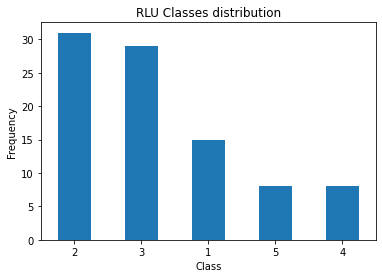

In [8]:
X= Lipid_prop_data.drop(['Luciferase activity (RLU) *'],axis = 1).to_numpy()
y = Lipid_prop_data['Luciferase activity (RLU) *'].to_numpy()
#BOx plot
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("RLU Classes distribution")

plt.xticks(range(5))

plt.xlabel("Class")

plt.ylabel("Frequency")
#target variable distribution
#plt.plot(y)
#plt.xlabel('samples')
#plt.ylabel('CLASS')
#plt.show()
#y.value_counts()

**Play with class weights¶**

An alternative to balancing is to specify class weights in the original dataset while building the model.
This permits the algorithm to give more importance to minority classes.
Class weights can be calculated through the class_weight() function of the sklearn.utils library.

In [9]:

from sklearn.utils import class_weight

classes = np.unique(y)
cw = class_weight.compute_class_weight('balanced', classes, y)
weights = dict(zip(classes,cw))
weights

{1: 1.2133333333333334,
 2: 0.5870967741935483,
 3: 0.6275862068965518,
 4: 2.275,
 5: 2.275}

AUC_Score: 0.8787920168067227


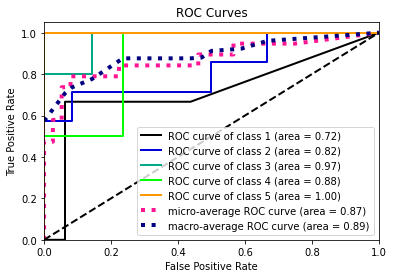

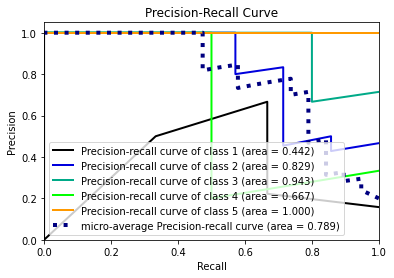


1 cross validation
#1 cross validation accuracy :0.6842105263157895, training data size: 72, testing data size: 19
ground_label : [2 2 2 1 2 1 2 2 3 2 4 5 5 4 1 3 3 3 3]
predict_label: [2 2 1 1 2 1 2 3 4 3 4 5 5 2 2 3 3 3 3]
#1 validation set index:[ 0 20 29 32 36 37 38 54 55 58 61 66 68 75 77 79 82 85 90]
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       0.67      0.57      0.62         7
           3       0.67      0.80      0.73         5
           4       0.50      0.50      0.50         2
           5       1.00      1.00      1.00         2

    accuracy                           0.68        19
   macro avg       0.70      0.71      0.70        19
weighted avg       0.68      0.68      0.68        19

AUC_Score: 0.8183333333333334


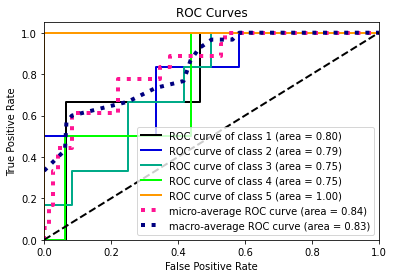

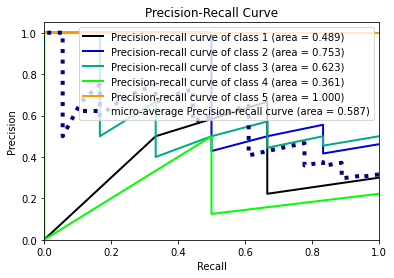


2 cross validation
#2 cross validation accuracy :0.6111111111111112, training data size: 73, testing data size: 18
ground_label : [1 2 2 1 2 1 3 2 3 2 3 4 5 3 2 3 4 3]
predict_label: [3 2 1 1 2 1 3 2 3 3 4 4 5 5 4 3 3 3]
#2 validation set index:[ 1  5 13 17 22 35 42 45 49 50 59 60 67 71 76 78 87 89]
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       1.00      0.50      0.67         6
           3       0.57      0.67      0.62         6
           4       0.33      0.50      0.40         2
           5       0.50      1.00      0.67         1

    accuracy                           0.61        18
   macro avg       0.61      0.67      0.60        18
weighted avg       0.70      0.61      0.62        18

AUC_Score: 0.8718055555555555


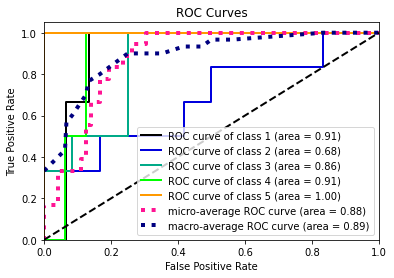

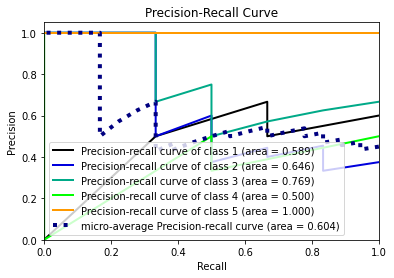


3 cross validation
#3 cross validation accuracy :0.4444444444444444, training data size: 73, testing data size: 18
ground_label : [2 3 2 1 2 2 1 1 3 2 3 3 4 3 4 2 5 3]
predict_label: [2 2 1 1 2 2 2 2 2 3 2 3 4 4 4 3 4 3]
#3 validation set index:[ 3  8 14 15 21 23 24 34 39 40 46 47 52 53 62 64 74 84]
              precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           2       0.38      0.50      0.43         6
           3       0.50      0.33      0.40         6
           4       0.50      1.00      0.67         2
           5       0.00      0.00      0.00         1

    accuracy                           0.44        18
   macro avg       0.38      0.43      0.38        18
weighted avg       0.43      0.44      0.42        18

AUC_Score: 0.7872875816993463


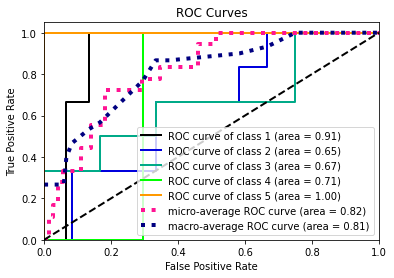

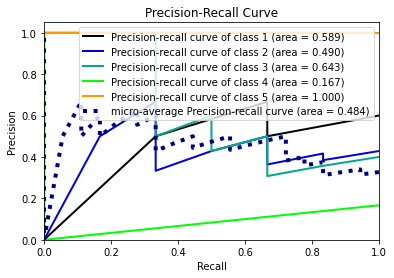


4 cross validation
#4 cross validation accuracy :0.5, training data size: 73, testing data size: 18
ground_label : [3 3 3 2 2 1 2 1 2 1 2 4 3 2 5 5 3 3]
predict_label: [2 2 2 2 1 1 2 1 2 2 3 3 3 4 5 4 3 3]
#4 validation set index:[ 4  7 10 11 16 18 25 26 27 28 44 56 57 63 70 73 83 88]
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       0.43      0.50      0.46         6
           3       0.60      0.50      0.55         6
           4       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         2

    accuracy                           0.50        18
   macro avg       0.54      0.43      0.47        18
weighted avg       0.57      0.50      0.52        18

AUC_Score: 0.843496732026144


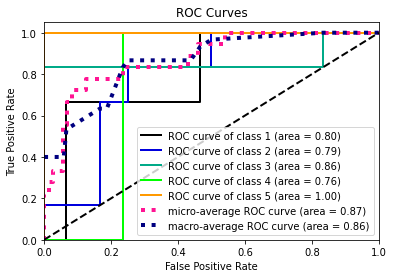

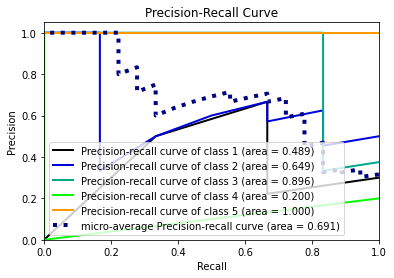


5 cross validation
#5 cross validation accuracy :0.6666666666666666, training data size: 73, testing data size: 18
ground_label : [2 2 2 1 1 1 2 3 2 3 3 2 4 5 5 3 3 3]
predict_label: [2 2 2 2 1 1 1 1 2 2 3 3 5 5 5 3 3 3]
#5 validation set index:[ 2  6  9 12 19 30 31 33 41 43 48 51 65 69 72 80 81 86]
              precision    recall  f1-score   support

           1       0.50      0.67      0.57         3
           2       0.67      0.67      0.67         6
           3       0.80      0.67      0.73         6
           4       0.00      0.00      0.00         1
           5       0.67      1.00      0.80         2

    accuracy                           0.67        18
   macro avg       0.53      0.60      0.55        18
weighted avg       0.65      0.67      0.65        18



In [10]:
#rf_clf = RandomForestClassifier(criterion="entropy", n_estimators=20, max_features=10, n_jobs=2)
#providesd the class_weight and given the high weight to minority classes
rf_clf=RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None, min_samples_split=5, min_samples_leaf=1,min_weight_fraction_leaf=0.0,
                                      max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                                      bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False,
                                      class_weight=weights, ccp_alpha=0.0, max_samples=None)

cv_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
#cv_kf = StratifiedKFold(n_splits=5)
cnt_iter = 0
CV_ACCURACY=[]
auc_score=[]
class_report=[]
for train_index, test_index in cv_kf.split(X, y):
    cnt_iter = cnt_iter+1
    X_train = X[train_index]
    y_train = y[train_index]
    X_test= X[test_index]
    y_test = y[test_index]

    rf_clf.fit(X_train, y_train)
    predicted_labels = rf_clf.predict(X_test)
    #calculating the ccuracy of the model
    ACC=(accuracy_score(y_test, predicted_labels))
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    # calculate the fpr and tpr for all thresholds of the classification
    probs = rf_clf.predict_proba(X_test)
    preds = probs
    #fpr, tpr,_= metrics.roc_curve(y_test, preds,multi_class="ovr")
    #roc_auc = metrics.auc(fpr, tpr)
    
    roc_auc=roc_auc_score(y_test,preds,multi_class="ovr")
    print("AUC_Score:",roc_auc)
    plot_roc(y_test,probs)
    #skplt.metrics.plot_roc_curve(y_test, preds)
    plt.show()
    plot_precision_recall(y_test, probs)
    plt.show()

    #print(test_size)
    print("\n{0} cross validation".format(cnt_iter))
    print('#{0} cross validation accuracy :{1}, training data size: {2}, testing data size: {3}' .format(cnt_iter, ACC, train_size, test_size))
    print("ground_label :",y_test)
    print("predict_label:",predicted_labels)
    print('#{0} validation set index:{1}'.format(cnt_iter,test_index))
    #a microaverage is dominated by the more frequent class , since the counts are pooled. The macroaverage better 
    #reflects the statistics of the smaller classes, and so is more appropriate when performance on all the classes is equally important.
    report=classification_report(y_test, predicted_labels)
    print(report)
    #print(confusion_matrix(y_test,predicted_labels))
    CV_ACCURACY.append(ACC)
    auc_score.append(roc_auc)
    class_report.append(report)

In [11]:
print("\t\t\taverage accuracy {}".format(sum(CV_ACCURACY)/len(CV_ACCURACY)*100))
print("\t\t\taverage AUC {}".format(sum(auc_score)/len(auc_score)*100))

			average accuracy 58.12865497076023
			average AUC 83.99430438842204
